<h1><center> Assignment 1: EDA United Nations General Debate Corpus  </center></h1>

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
df_un_merged = pd.read_csv('un_speeches_preprocessed.csv')
df_un_merged = df_un_merged.set_index(["Year", "ISO-alpha3 Code"])
df_un_merged.sort_index(level=["Year", "ISO-alpha3 Code"], ascending=[1,1], inplace=True)
df_un_merged.head()

Country or Area Region Name  \
Year ISO-alpha3 Code                               
1970 ALB                     Albania      Europe   
     ARG                   Argentina    Americas   
     AUS                   Australia     Oceania   
     AUT                     Austria      Europe   
     BEL                     Belgium      Europe   

                                      Sub-region Name  \
Year ISO-alpha3 Code                                    
1970 ALB                              Southern Europe   
     ARG              Latin America and the Caribbean   
     AUS                    Australia and New Zealand   
     AUT                               Western Europe   
     BEL                               Western Europe   

                     Developed / Developing Countries  Session  \
Year ISO-alpha3 Code                                             
1970 ALB                                    Developed       25   
     ARG                                   Developing       25   
     AUS                                    Developed       25   
     AUT                                    Developed       25   
     BEL                                    Developed       25   

                                                                 Speech  
Year ISO-alpha3 Code                                                     
1970 ALB              33: May I first convey to our President the co...  
     ARG              177.\t : It is a fortunate coincidence that pr...  
     AUS              100.\t  It is a pleasure for me to extend to y...  
     AUT              155.\t  May I begin by expressing to Ambassado...  
     BEL              176. No doubt each of us, before coming up to ...

We are now going to use NLTK

Please run the cell below to import NLTK and download the needed resources

In [5]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rikva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rikva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rikva\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Let us now see some examples of word analysis with NLTK:

Which were the most frequent words used in the Austrian Speech in 1970?

In [6]:
from nltk.probability import FreqDist
from nltk import word_tokenize

# load text of Austria in 1970
text = df_un_merged.loc[1970,'AUT']["Speech"]

# tokenize words
words = word_tokenize(text)

# compute word frequency
freq = FreqDist(words)

# show 30 most frequent words
freq.most_common(30)

[('the', 383),
 ('of', 268),
 (',', 180),
 ('to', 163),
 ('.', 160),
 ('and', 116),
 ('in', 104),
 ('a', 91),
 ('that', 55),
 ('by', 39),
 ('this', 39),
 ('for', 39),
 ('which', 38),
 ('be', 35),
 ('on', 34),
 ('is', 32),
 ('United', 30),
 ('The', 29),
 ('Nations', 28),
 ('as', 27),
 ('Austria', 26),
 ('our', 23),
 ('with', 23),
 ('I', 22),
 ('international', 22),
 ('it', 22),
 ('has', 21),
 ('States', 21),
 ('all', 20),
 ('its', 20)]

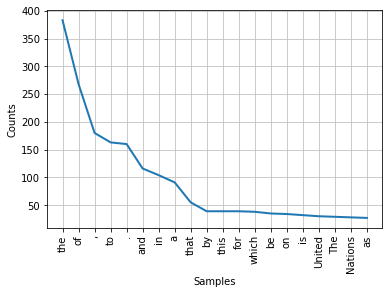

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
# plot the histogram with the top most used words
freq.plot(20)

Notice that the most frequent words are not that informative about the Austrian speech (the, of, to...). These words are often called *stop-words*. These words are generally filtered out before processing text (natural language). These are actually some of the most common words in any language (articles, prepositions, pronouns, conjunctions, etc) but do not add much information to the text. Let's now use NLTK to filter those words

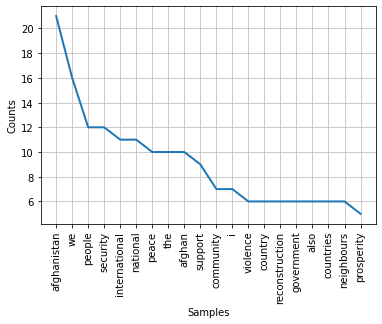

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
from nltk.corpus import stopwords

def preprocess(words):
    sw = stopwords.words("english")
    no_sw = []
    for w in words:
        if (w not in sw and w.isalpha() == True):
            no_sw.append(w.lower())
    return no_sw

text = df_un_merged.loc[2002,"AFG"]["Speech"]

words = word_tokenize(text)
words = preprocess(words)
freq = FreqDist(words)

freq.plot(20)

**Q: Can you change the method preprocess to put all words in lower case, remove punctuation and remove non-informative words (e.g., United Nations)?**

Tip: the method isalpha() might be useful

A regular expression is a sequence of characters that specifies a pattern. Usually, such patterns are used by to find, match, replace sub-strings within a document. Regular expressions have a particular syntax and are often useful to clean and pre-process textual data. Here one example where the regular expression 'afg.\*' is used to match any word that starts with afg and is followed by any character. 

In [9]:
# Regular expression example
s = set({})
import re
for w in words:
    if re.match('afg.*', w):
        s.add(w)
print(s)

{'afghan', 'afghanistan', 'afghans'}


Another useful usage of NLTK is performing sentiment analysis.

Sentiment analysis can be seen as the process of automatically classifying text into positive or negative sentiment categories. With NLTK, you can employ these algorithms without effort. This was also called opinion mining.

In the political field, sentiment analysis is used to keep track of political view, to detect consistency and inconsistency between statements and actions at the government level or to derive the opinion or attitude of a speaker.

NLTK implements VADER (Valence Aware Dictionary and sEntiment Reasoner), which is a lexicon and rule-based sentiment analysis. VADER uses a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

NLTK implements VADER through the module SentimentIntensityAnalyzer. Below an example of application (with natural limitations as VADER is specifically attuned to sentiments expressed in **social media**):

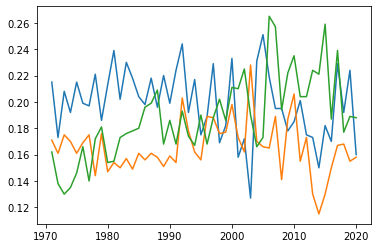

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt

sia = SentimentIntensityAnalyzer()

vecUSA = [sia.polarity_scores(df_un_merged.loc(axis=0)[i,"USA"]["Speech"])['pos'] for i in np.arange(1971, 2021)]
vecRUS = [sia.polarity_scores(df_un_merged.loc(axis=0)[i,"RUS"]["Speech"])['pos'] for i in np.arange(1971, 2021)]
vecCHN = [sia.polarity_scores(df_un_merged.loc(axis=0)[i,"CHN"]["Speech"])['pos'] for i in np.arange(1971, 2021)]

fig, ax = plt.subplots()
ax.plot(np.arange(1971, 2021), vecUSA)
ax.plot(np.arange(1971, 2021), vecRUS)
ax.plot(np.arange(1971, 2021), vecCHN)
plt.show()

In [11]:
happinessdataframe = pd.read_excel('DataPanelWHR2021C2.xls', index_col=[0,1]) 
happinessdataframe

Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Afghanistan  2008     3.723590            7.370100        0.450662   
             2009     4.401778            7.539972        0.552308   
             2010     4.758381            7.646709        0.539075   
             2011     3.831719            7.619532        0.521104   
             2012     3.782938            7.705479        0.520637   
...                        ...                 ...             ...   
Zimbabwe     2016     3.735400            7.984372        0.768425   
             2017     3.638300            8.015738        0.754147   
             2018     3.616480            8.048798        0.775388   
             2019     2.693523            7.950132        0.759162   
             2020     3.159802            7.828757        0.717243   

                   Healthy life expectancy at birth  \
Country name year                                     
Afghanistan  2008                         50.799999   
             2009                         51.200001   
             2010                         51.599998   
             2011                         51.919998   
             2012                         52.240002   
...                                             ...   
Zimbabwe     2016                         54.400002   
             2017                         55.000000   
             2018                         55.599998   
             2019                         56.200001   
             2020                         56.799999   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Afghanistan  2008                      0.718114    0.167640   
             2009                      0.678896    0.190099   
             2010                      0.600127    0.120590   
             2011                      0.495901    0.162427   
             2012                      0.530935    0.236032   
...                                         ...         ...   
Zimbabwe     2016                      0.732971   -0.094634   
             2017                      0.752826   -0.097645   
             2018                      0.762675   -0.068427   
             2019                      0.631908   -0.063791   
             2020                      0.643303   -0.008696   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Afghanistan  2008                   0.881686         0.517637         0.258195  
             2009                   0.850035         0.583926         0.237092  
             2010                   0.706766         0.618265         0.275324  
             2011                   0.731109         0.611387         0.267175  
             2012                   0.775620         0.710385         0.267919  
...                                      ...              ...              ...  
Zimbabwe     2016                   0.723612         0.737636         0.208555  
             2017                   0.751208         0.806428         0.224051  
             2018                   0.844209         0.710119         0.211726  
             2019                   0.830652         0.716004         0.235354  
             2020                   0.788523         0.702573         0.345736  

[1949 rows x 9 columns]

Some questions I have in mind that might be interesting:

* What are the words used by the happiest countries in the world ? Does this change over time? What about the saddest countries? 
* What are the most used words per continent ? Does this changes over time?
* What can we see about the influence of big international events on speeches? For example, did the 2008 subprime crisis change the speeches ? What about the Paris agreement on the climate in 2015?

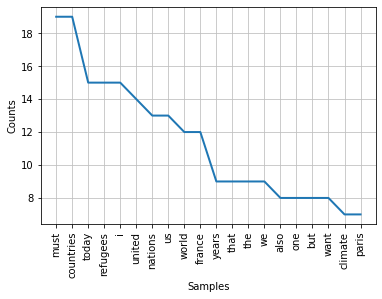

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
text = df_un_merged.loc[2015,"FRA"]["Speech"]

words = word_tokenize(text)
words = preprocess(words)
freq = FreqDist(words)

freq.plot(20)

**Question** What are the most refered countries. Which countries are refering other the most. Can we find any interesting realtion ship if we agregate the data by continents?

In [13]:
speeches_NDL = df_un_merged.xs("NLD",level=1,drop_level=False)["Speech"]

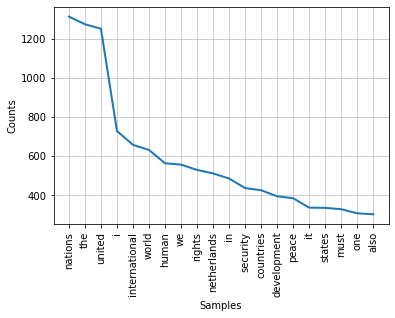

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
words=[]
for row in speeches_NDL:
    words += word_tokenize(row)
    

#words = word_tokenize(text)
words = preprocess(words)
freq = FreqDist(words)

freq.plot(20)

We successfully aggregated the data for all the years for the Netherlands. But now let's try to plot only the countries the Netherlands are reffering to.

In [15]:
country_names = [country.lower() for country in df_un_merged["Country or Area"]]
country_names

['albania',
 'argentina',
 'australia',
 'austria',
 'belgium',
 'belarus',
 'bolivia (plurinational state of)',
 'brazil',
 'canada',
 'cameroon',
 'congo',
 'colombia',
 'costa rica',
 'cuba',
 'dominican republic',
 'algeria',
 'ecuador',
 'france',
 'united kingdom of great britain and northern ireland',
 'ghana',
 'guinea',
 'gambia',
 'guatemala',
 'honduras',
 'haiti',
 'indonesia',
 'india',
 'iran (islamic republic of)',
 'iraq',
 'iceland',
 'israel',
 'italy',
 'japan',
 'kenya',
 'cambodia',
 'kuwait',
 'lebanon',
 'liberia',
 'libya',
 'sri lanka',
 'morocco',
 'madagascar',
 'mexico',
 'myanmar',
 'netherlands',
 'norway',
 'new zealand',
 'pakistan',
 'peru',
 'philippines',
 'paraguay',
 'rwanda',
 'sudan',
 'singapore',
 'sierra leone',
 'el salvador',
 'somalia',
 'syrian arab republic',
 'togo',
 'thailand',
 'trinidad and tobago',
 'tunisia',
 'turkey',
 'ukraine',
 'uruguay',
 'united states of america',
 'venezuela (bolivarian republic of)',
 'south africa',
 'zam

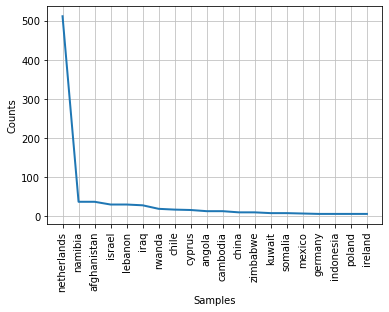

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
#Let's define a new preprocess function that will only keep the countries
def preprocess_country(words):
    sw = stopwords.words("english")
    no_sw = []
    for w in words:
        if (w not in sw and w.isalpha() == True and w.lower() in country_names):
            no_sw.append(w.lower())
    return no_sw

words=[]
for row in speeches_NDL:
    words += word_tokenize(row)

#words = word_tokenize(text)
words = preprocess_country(words)
freq = FreqDist(words)

freq.plot(20)


Let's now create a function that take an iso name in input and give back a list of countries referenced.

In [17]:
def countries_referenced(iso):
    speeches_iso = df_un_merged.xs(iso,level=1,drop_level=False)["Speech"]
    words=[]
    for row in speeches_iso:
        words += word_tokenize(row)
    
    words = preprocess_country(words)
    freq = FreqDist(words)
    return freq

In [18]:
countries_referenced("FRA")

FreqDist({'france': 860, 'lebanon': 90, 'israel': 55, 'iraq': 43, 'afghanistan': 39, 'cambodia': 37, 'germany': 32, 'cyprus': 31, 'namibia': 26, 'china': 24, ...})

This is nice and works but let's remove the first country referenced if it is itself.

In [19]:
next(iter(countries_referenced("FRA")))

'france'

In [20]:
df_codes = pd.read_csv('UNSD — Methodology.csv', delimiter=";")
df_codes.head()

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN,Developing
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN,Developing
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN,Developing
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN,Developing
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN,Developing


In [21]:
def countries_referenced_first_removed(iso):
    try:
        speeches_iso = df_un_merged.xs(iso,level=1,drop_level=False)["Speech"]
    except:
        return FreqDist()
    words=[]
    for row in speeches_iso:
        words += word_tokenize(row)
    
    words = preprocess_country(words)
    freq = FreqDist(words)
    #We add an if condition to remove the first element of dict if it is the country studied
    if next(iter(freq)) == df_codes.loc[df_codes['ISO-alpha3 Code'] == iso, "Country or Area"].iloc[0].lower():
        freq.pop(next(iter(freq)), None)
        
    return freq

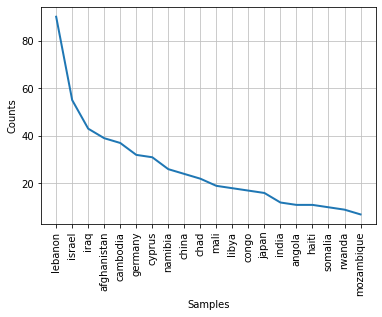

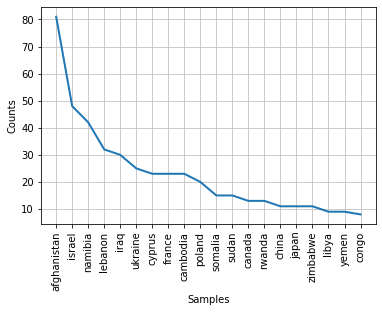

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
countries_referenced_first_removed("FRA").plot(20)
countries_referenced_first_removed("DEU").plot(20)

Quite interestingly we can see that some countries are appearing many times in the top 5 like israel, afghanistan, lebanon and irak. Let's try to view it on a map.

In [23]:
import geopandas as gpd

#We import the data set below just to have the geometries of all the countries, we intend to change the rest of the data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).drop(["pop_est","gdp_md_est"], axis=1)
world.head()

,continent,name,iso_a3,geometry
0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Africa,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Africa,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


The cell below is very slow to run but here is what it does:
* It iterates thourgh each ISO code and will do the frequency of the countries referenced by the speaking one (the iso)
* It adds all these frequencies to have an überfrequency table which aggregates all the countries referenced too. It doesn't count when a country is referencing to iself.

I did it that way instead of aggregating all the speeches first for one reason: with this code, we can create a dictionnary of frequency dist per country and per year, which might be useful in the future

In [24]:
referenced_countries = FreqDist()
for iso in df_codes["ISO-alpha3 Code"]:
    #Line below to see if we can easily merge on ISO --> It works
    #print(world.loc[world['iso_a3'] == iso])
    #print(countries_referenced_first_removed(iso))
    referenced_countries += countries_referenced_first_removed(iso)

print(referenced_countries)

<FreqDist with 147 samples and 101607 outcomes>


In [25]:
print(dict(referenced_countries))

{'congo': 1490, 'namibia': 7225, 'guinea': 2038, 'angola': 2921, 'mozambique': 1377, 'jordan': 514, 'israel': 10314, 'cambodia': 1611, 'china': 3268, 'bahrain': 180, 'qatar': 250, 'india': 1603, 'pakistan': 1155, 'mauritania': 208, 'portugal': 1050, 'senegal': 193, 'zimbabwe': 2174, 'indonesia': 653, 'poland': 321, 'germany': 1474, 'japan': 1080, 'egypt': 975, 'chile': 707, 'morocco': 517, 'peru': 265, 'panama': 603, 'cuba': 1582, 'bahamas': 203, 'spain': 530, 'cyprus': 3091, 'luxembourg': 182, 'seychelles': 209, 'lebanon': 3950, 'djibouti': 323, 'comoros': 233, 'tunisia': 180, 'libya': 1338, 'sweden': 230, 'colombia': 579, 'belize': 590, 'afghanistan': 4794, 'iraq': 5229, 'botswana': 139, 'zambia': 371, 'hungary': 124, 'chad': 902, 'bangladesh': 622, 'guatemala': 506, 'argentina': 606, 'nigeria': 501, 'malta': 171, 'yemen': 593, 'liechtenstein': 138, 'kuwait': 1036, 'lithuania': 179, 'estonia': 203, 'latvia': 190, 'bulgaria': 183, 'guyana': 268, 'rwanda': 1005, 'liberia': 888, 'somali

In [26]:
dict_referenced_countries = dict(referenced_countries)

#First iteration to add the number of time a country is referenced
for index,row in world.iterrows():
    try:
        world.at[index,'N° Referenced'] = dict_referenced_countries[row["name"].lower()]
    except:
        world.at[index,'N° Referenced'] = 0

#Second iteration where we add the number of papers
for index,row in world.iterrows():
    try:
        world.at[index,'N° Publications'] = df_knowledge.loc[df_knowledge['Country'] == row["name"], 'Overall'].iloc[0]
    except:
        world.at[index,'N° Publications'] = 0

In [27]:
#world.drop('N°referenced')
world.head()

,continent,name,iso_a3,geometry,N° Referenced,N° Publications
0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",254.0,0.0
1,Africa,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.0,0.0
2,Africa,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0,0.0
3,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",390.0,0.0
4,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.0,0.0


<AxesSubplot:>

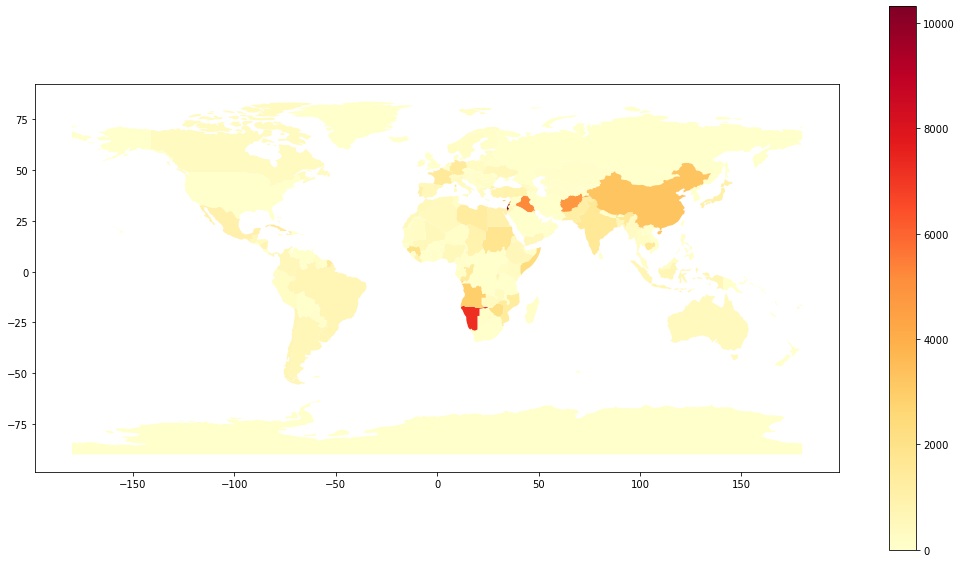

In [28]:
world.plot("N° Referenced", figsize=(18,10),legend=True,cmap='YlOrRd')

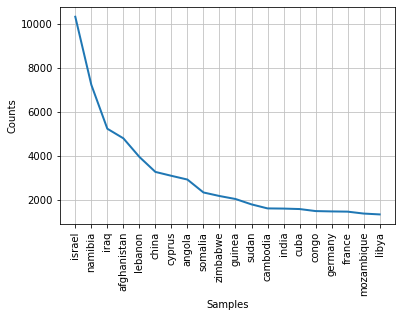

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [29]:
referenced_countries.plot(20)

We can see that by looking at all the speeches aggregated over time, some countries are the center of the attention. These are Israel, Namibia, Iraq, Afghanistan, Lebanon, China, Cyprus and a few others.

Let's now do another analysis about the number of publication per country. This is just some EA.

In [36]:
!pip3 install openpyxl

In [37]:
df_knowledge = pd.read_excel('Scholarly_Output_vs_Publication_Year_land.xlsx')
df_knowledge.head()

,Country,Overall,1996,1997,1998,1999,2000,2001,2002,2003,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,91176,384,411,476,496,552,646,700,918,...,4377,5037,5373,6105,6818,7426,8030,8670,8397,7177
1,Argentina,255162,4296,4823,4833,5145,5483,5695,6133,6312,...,12255,12512,13394,13644,14149,14505,15290,15033,17017,12696
2,Armenia,20991,421,352,370,385,484,473,503,544,...,1182,1088,1104,1122,1182,1214,1271,1418,1281,867
3,Australia,1713992,26084,27388,28393,28829,30712,31588,33260,37511,...,82204,90603,93388,96881,102284,105209,108084,111634,116919,97544
4,Austria,471842,7847,8384,8437,8795,9237,9858,10673,12014,...,22684,23793,24213,25503,26257,27168,27828,28669,30089,24454


In [38]:
df_knowledge = pd.read_excel('Scholarly_Output_vs_Publication_Year_land.xlsx')

<AxesSubplot:>

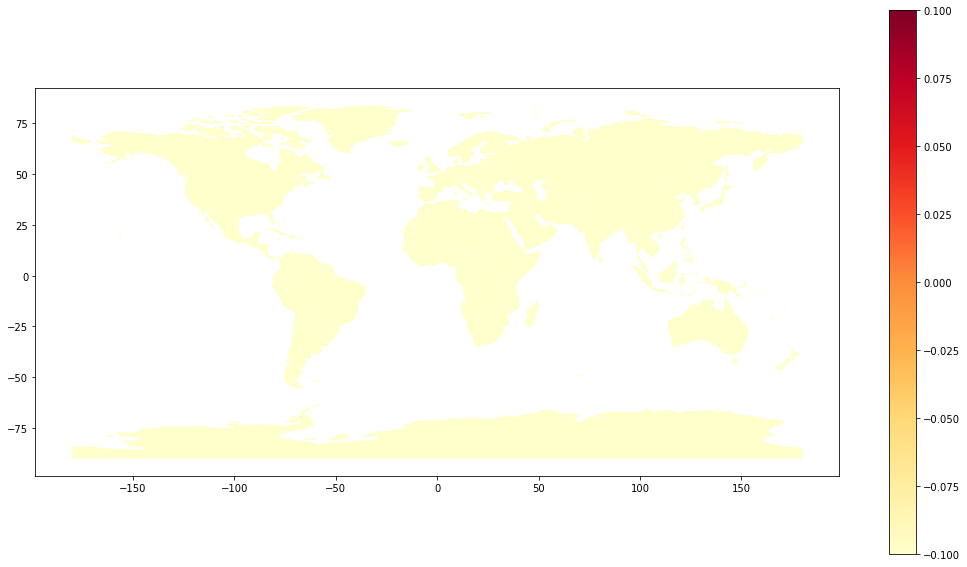

In [39]:
world.plot("N° Publications", figsize=(18,10),legend=True,cmap='YlOrRd')

The results we have are expeected except for one notorious country: the United States. Because of the space between "united" and "states" we lost the data along the way. If we had it, they would be the darkest country in the visualization. Indeed they have 14M papers published compared to the 8M of China.